# Bellabeat

## 1. Mission statement

Bellabeat is a high-tech company that manufactures health-focused smart products. They developBell technology that informs and inspires women around the world. The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

## 2. Ask Phase

### 1.Identify the business task

Gain insight of the trends. What are some of the trends that shows how consumers use non-Bellabeat smart devices and apply these insights into Bellabeat`s marketing strategy.

### 2.Consider key stakeholders

1. Urška Sršen: Bellabeat's co founder and Chief Creative Officer 
2. Sando Mur: Mathematician and Bellabeat cofounder; key member of the Bellabeat executive team 
3. Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat's marketing strategy

## 3. Prepare Phase

### 1.Data Sources Used

The data source used in our case study is FitBit Fitness Tracker Data,  and this data is stored in Kaggle and made available through Mobius.

### 2.Accessibility and privacy of data

We can confirm that the metadata of our dataset is open-source, the owner published this data set on public domain giving the rights to work under copyright law. You are allowed to copy, modify and work with this dataset without asking permission.

### 3.Data Organization and verification

This data set contains 18 CSV documents. Each document represents different data tracked by Fitbit

### 4. Information about our dataset

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

## 4. Process Phase

Because of the amount of data we will use R so later on we can create data visualization and share the resultats with the stakeholders.

### 1.Installing packages and opening libraries

We will install the necessary packages and open them. We will use the following packages:

In [1]:
library(tidyverse)
library(skimr)
library(janitor)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 2.Importing datasets

In our analysis we will focus on the following datasets:

* Daily activity

* Daily sleep

* Hourly steps

In [2]:
daily_activity<-read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep<-read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps<-read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

### 3.Preview of the datasets

We will preview the datasets and check the summary of each column.

In [3]:
head(daily_activity)
str(daily_activity)
head(daily_sleep)
str(daily_sleep)
head(hourly_steps)
str(hourly_steps)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


### 4.Cleaning the datasets

We will start with verifying the number of users.

In [4]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(hourly_steps$Id)

nrow(daily_activity)
nrow(daily_sleep)
nrow(hourly_steps)

[1] 33

[1] 24

[1] 33

[1] 940

[1] 413

[1] 22099

Search for any duplicates and if there are some we are going to remove them. After verifying removing the duplicates. 

In [5]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))

daily_activity<-daily_activity %>%
  distinct() %>%
  drop_na()
daily_sleep<-daily_sleep %>%
  distinct() %>%
  drop_na()
hourly_steps<-hourly_steps %>%
  distinct() %>%
  drop_na()

[1] 0

[1] 3

[1] 0

We are verifying again if we removed all the duplicates.

In [6]:
sum(duplicated(daily_sleep))

[1] 0

We will clean and rename columns, because it is important when working later for the column names to use the right syntax and all column names to be in the same format when merging them. We are going to change all the column names into lowercase.

In [7]:
clean_names(daily_activity)
daily_activity<-rename_with(daily_activity,~ tolower (gsub(".", "_", .x, fixed = TRUE)))
clean_names(daily_sleep)
daily_sleep<-rename_with(daily_sleep, ~ tolower(gsub(".", "_", .x, fixed = TRUE)))
clean_names(hourly_steps)
hourly_steps<-rename_with(hourly_steps, ~ tolower(gsub(".", "_", .x, fixed = TRUE)))

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_hour,step_total
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0
1503960366,4/12/2016 6:00:00 AM,0
1503960366,4/12/2016 7:00:00 AM,0
1503960366,4/12/2016 8:00:00 AM,250


After we verified the column names and changed them, we are focusing now on cleaning the date time format.

In [8]:
head(daily_activity)
head(daily_sleep)
head(hourly_steps)

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,id,activityhour,steptotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


After we verified the column names and changed them, we are focusing now on cleaning the date time format.

In [9]:
daily_activity<-daily_activity %>%
  rename(date= activitydate) %>%
  mutate(data= as_date(date, format="%m/%d/%Y"))
daily_sleep<-daily_sleep %>%
  rename(date= sleepday) %>%
  mutate(date = as_date(date,format ="%m/%d/%Y %I:%M:%S %p"))

hourly_steps<-hourly_steps %>%
  rename(date_time=activityhour) %>%
  mutate(date_time=as.POSIXct(date_time,format="%m/%d/%Y %I:%M:%S %p" , Sys.timezone()))

In [10]:
daily_sleep$date <- format(daily_sleep$date, format = "%m/%d/%Y")
daily_activity$date <- as.POSIXct( daily_activity$date, format="%m/%d/%Y" )
daily_activity$date <- format( daily_activity$date, format="%m/%d/%Y" )

We will now check the cleaned datasets.

In [11]:
head(daily_activity)
head(daily_sleep)
head(hourly_steps)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,data
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>
1,1503960366,04/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
2,1503960366,04/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
3,1503960366,04/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
4,1503960366,04/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
5,1503960366,04/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
6,1503960366,04/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,04/12/2016,1,327,346
2,1503960366,04/13/2016,2,384,407
3,1503960366,04/15/2016,1,412,442
4,1503960366,04/16/2016,2,340,367
5,1503960366,04/17/2016,1,700,712
6,1503960366,04/19/2016,1,304,320


,id,date_time,steptotal
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12 00:00:00,373
2,1503960366,2016-04-12 01:00:00,160
3,1503960366,2016-04-12 02:00:00,151
4,1503960366,2016-04-12 03:00:00,0
5,1503960366,2016-04-12 04:00:00,0
6,1503960366,2016-04-12 05:00:00,0


### 5.Merging the data

We will merge the daily_activity and daily_sleep in one data frame called merge_daily by using id and date as their primary keys, to see if there is any correlation between those two variables. 

In [12]:
merge_daily<- merge(daily_activity, daily_sleep, by=c("id","date"), all = TRUE)
glimpse(merge_daily)

merge_daily<-merge_daily %>%
  select(-c("trackerdistance", "loggedactivitiesdistance", "totalsleeprecords", "totalsleeprecords", "data"))
head(merge_daily)
str(merge_daily)

Rows: 940
Columns: 19
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <chr> "04/12/2016", "04/13/2016", "04/14/2016", "04…
$ totalsteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ totaldistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ trackerdistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ fairlyactiveminutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ lightlyactivemin

,id,date,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/2016,13162,8.50,1.88,0.55,6.06,0,25,13,328,728,1985,327,346
2,1503960366,04/13/2016,10735,6.97,1.57,0.69,4.71,0,21,19,217,776,1797,384,407
3,1503960366,04/14/2016,10460,6.74,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA
4,1503960366,04/15/2016,9762,6.28,2.14,1.26,2.83,0,29,34,209,726,1745,412,442
5,1503960366,04/16/2016,12669,8.16,2.71,0.41,5.04,0,36,10,221,773,1863,340,367
6,1503960366,04/17/2016,9705,6.48,3.19,0.78,2.51,0,38,20,164,539,1728,700,712


'data.frame':	940 obs. of  15 variables:
 $ id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                    : chr  "04/12/2016" "04/13/2016" "04/14/2016" "04/15/2016" ...
 $ totalsteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ totaldistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ veryactivedistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderatelyactivedistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ lightactivedistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentaryactivedistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ veryactiveminutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairlyactiveminutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightlyactiveminutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentaryminutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ calories                : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...
 $ tota

## 5.Analyze and Share Phase

In this phase we will analyze trends of the users of FitBit that can help us in determining BellaBeat`s marketing strategy.

### 1.Type of users per activity level

In this phase we want to determine the type of users, we will categorize the type of user by classifying the users by activity in view of daily amount of steps.

* Sedentary is less than 5,000 per day

* Low active is from 5,000 to 7,499 per day

* Average active is 7,500 to 9,999 per day

* Active is more than 10,000 per day

I used this article to make the classification:

https://greatist.com/health/how-many-steps-a-day#how-many-steps

In [13]:
daily_average<-merge_daily %>%
  group_by(id) %>%
  summarise(mean_totalsteps=mean(totalsteps, na.rm=TRUE), mean_totalcalories=mean(calories, na.rm=TRUE), mean_totalminutesasleep=mean(totalminutesasleep, na.rm=TRUE, trim=0))

head(daily_average)

id,mean_totalsteps,mean_totalcalories,mean_totalminutesasleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,1816.419,360.28
1624580081,5743.903,1483.355,NaN
1644430081,7282.967,2811.300,294.00
1844505072,2580.065,1573.484,652.00
1927972279,916.129,2172.806,417.00
2022484408,11370.645,2509.968,NaN


Classifying users type by the daily average steps.

In [14]:
user_type<-daily_average %>%
  mutate(user_type=case_when(
    mean_totalsteps < 5000 ~ "Sedentary active",
    mean_totalsteps >= 5000 & mean_totalsteps <= 7499 ~ "Low active",
    mean_totalsteps >= 7500 & mean_totalsteps <= 9999 ~ "Moderat active",
    mean_totalsteps > 10000 ~ "Very active"))

head(user_type)

id,mean_totalsteps,mean_totalcalories,mean_totalminutesasleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,1816.419,360.28,Very active
1624580081,5743.903,1483.355,NaN,Low active
1644430081,7282.967,2811.300,294.00,Low active
1844505072,2580.065,1573.484,652.00,Sedentary active
1927972279,916.129,2172.806,417.00,Sedentary active
2022484408,11370.645,2509.968,NaN,Very active


For better visualization we will create a new data frame with percentage of each type.


In [15]:
user_type_percent<-user_type %>%
  group_by(user_type) %>%
  summarise(total= n()) %>%
  mutate(totals=sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent=total/totals) %>%
  mutate(percents=scales::percent(total_percent))

head(user_type_percent)

user_type,total_percent,percents
<chr>,<dbl>,<chr>
Low active,0.2727273,27.3%
Moderat active,0.2727273,27.3%
Sedentary active,0.2424242,24.2%
Very active,0.2121212,21.2%


Visualizing using the pie chart.


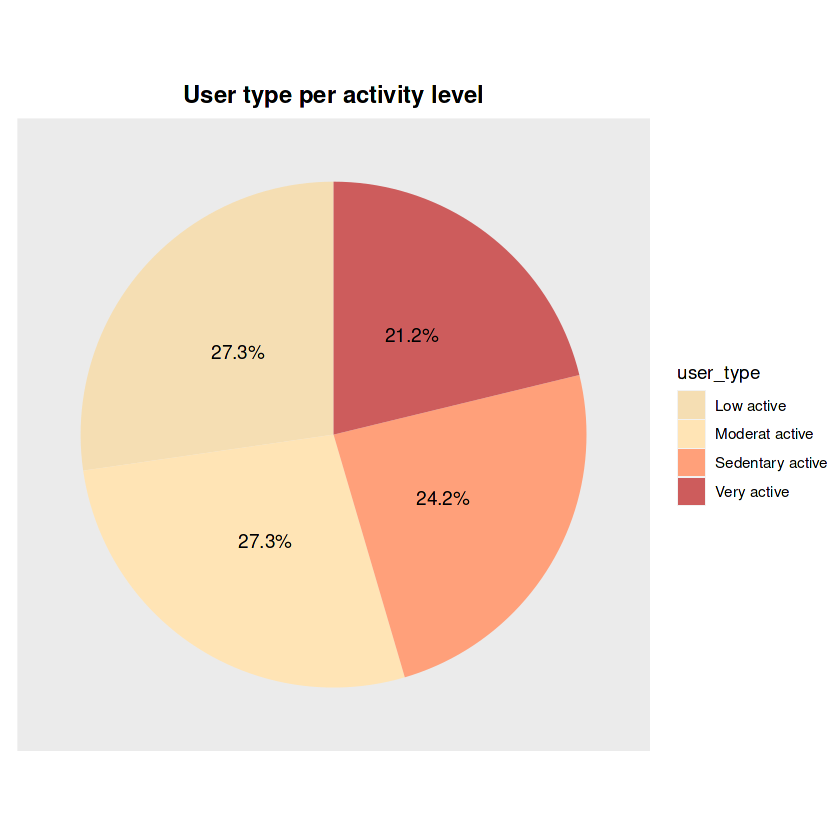

In [16]:
user_type_percent %>%
  ggplot(aes(x="", y=total_percent, fill=user_type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("wheat", "moccasin", "lightsalmon", "indianred")) +
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label = percents),
            position = position_stack(vjust = 0.5)) +
  labs(title = "User type per activity level")

### 2.Total steps and calories

We want to know if there is some correlation between total steps and calories.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



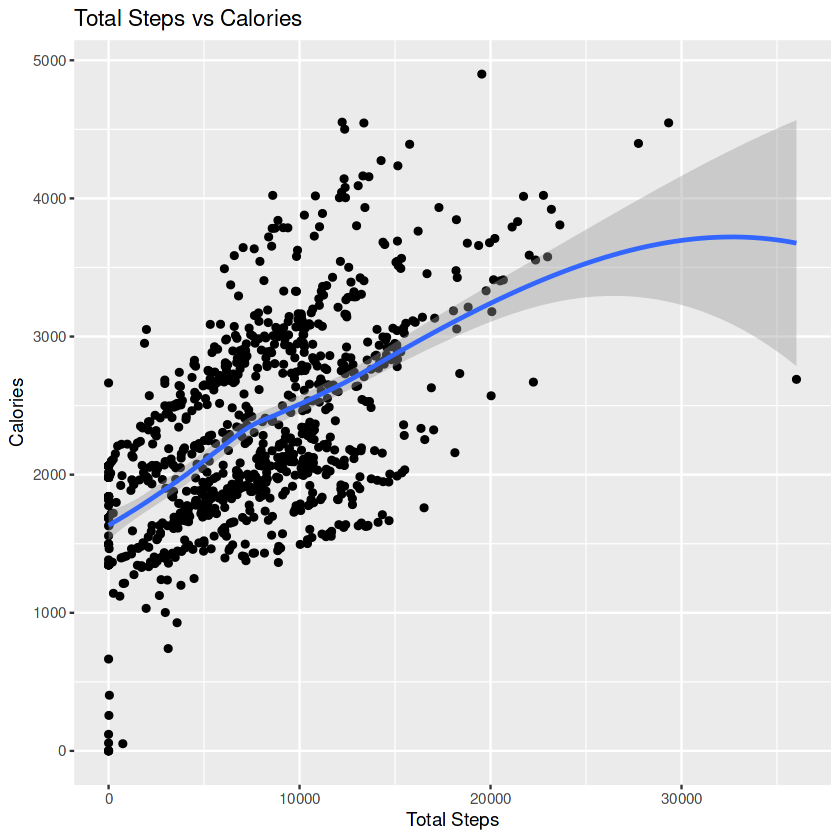

In [17]:
daily_activity %>%
  ggplot(aes(x=totalsteps, y=calories)) +
  geom_point()+
  geom_smooth() +
  labs(title= "Total Steps vs Calories", x="", y="")+
  xlab('Total Steps') +
  ylab('Calories')

We see a positive correlation between those two variables, the more active the users are, the more calories they burn. 

### 3.Hourly steps throughout the day

We want to know when the users are more active in a day, and look for any trends.

We will separate the date and time in two different columns.

In [18]:
hourly_steps$time <- format(as.POSIXct(hourly_steps$date_time,format="%Y-%m-%d %H:%M:%S"),"%H:%M:%S")
hourly_steps$date <- format(as.POSIXct(hourly_steps$date_time,format="%Y-%m-%d %H:%M:%S"),"%Y-%m-%d")

In [19]:
hourly_steps<-hourly_steps %>%
  group_by(time) %>%
  summarise(average_steps=mean(steptotal))

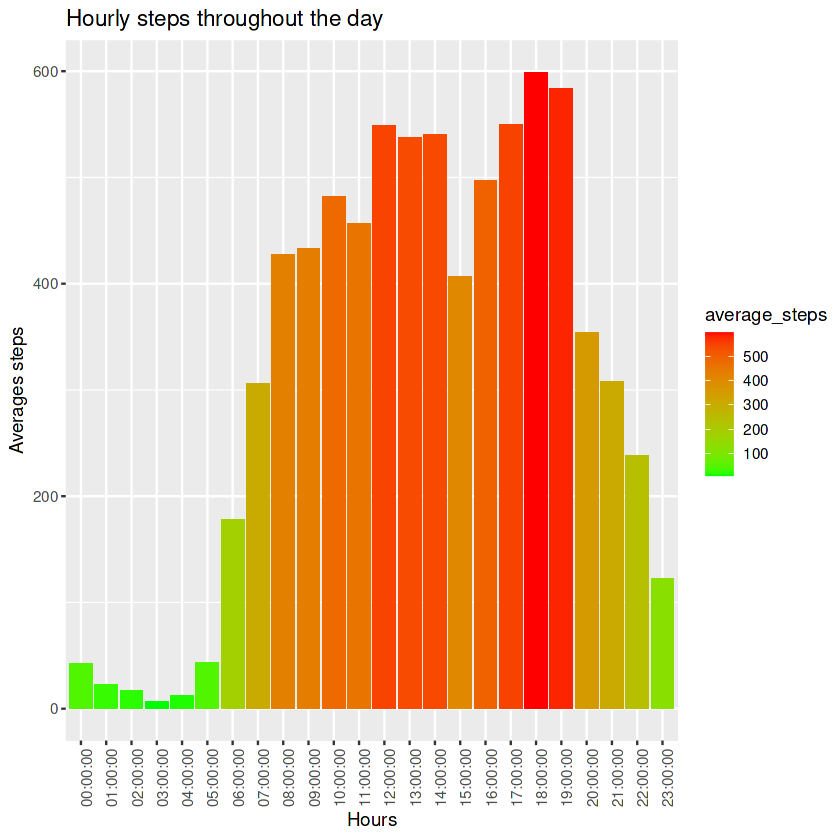

In [20]:
hourly_steps %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y=average_steps, fill=average_steps)) +
  labs(title = "Hourly steps throughout the day", x="", y="") +
  xlab('Hours') +
  ylab('Averages steps') +
  scale_fill_gradient(low = "green", high = "red")+
  theme(axis.text.x = element_text(angle = 90))

We can see that users are more active between 07:00 and 19:00. During the lunch time from 12:00 till 14:00 and evenings from 17:00 till 19:00, users are walking more steps than the others periodes. 

### 4.Sleep status

Going deeply into the analysis we want to analyze the sleep time. Average woman needs to sleep more than 7 hours per night. 

Our thesis is that: 

recommended amount of sleep for adult is >420 min

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


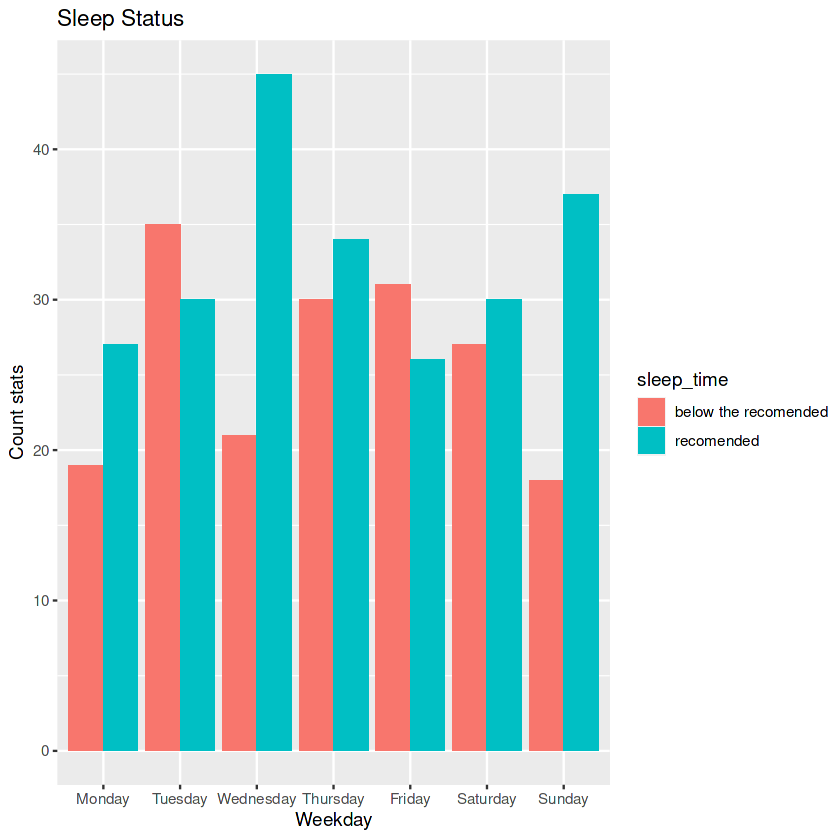

In [21]:
sleep_time<-daily_sleep %>%
  group_by(id,date) %>%
  summarise(mean_totalminutesasleep=mean(totalminutesasleep))

sleep_time<-sleep_time %>%
  mutate(sleep_time=case_when(
    mean_totalminutesasleep < 420 ~ "below the recomended",
    mean_totalminutesasleep >= 420 ~ "recomended"))

weekday_sleep<-sleep_time %>%
  mutate(weekday=weekdays(as.POSIXct(date,format="%m/%d/%Y")))

  ggplot(weekday_sleep, aes( x=factor(weekday, level=c('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday')),fill=sleep_time)) +
    xlab('Weekday') +
    ylab('Count stats') +
    geom_bar(position = position_dodge(),stat = "count") +
    ggtitle("Sleep Status")

This dataframe shows only the total minutes asleep, for better understanding the sleeping status of the users we recommend to add data that also contains types of sleeping like deep or light sleep.

### 5.Time use of smart device

Now that we have some trends in user activity, calories burned, sleeping and hourly steeps, we want to see how long users use their device. 

My thesis:

All day = 100%

More than half a day= 100%<=50%

Less than half a day= 50%<=0%

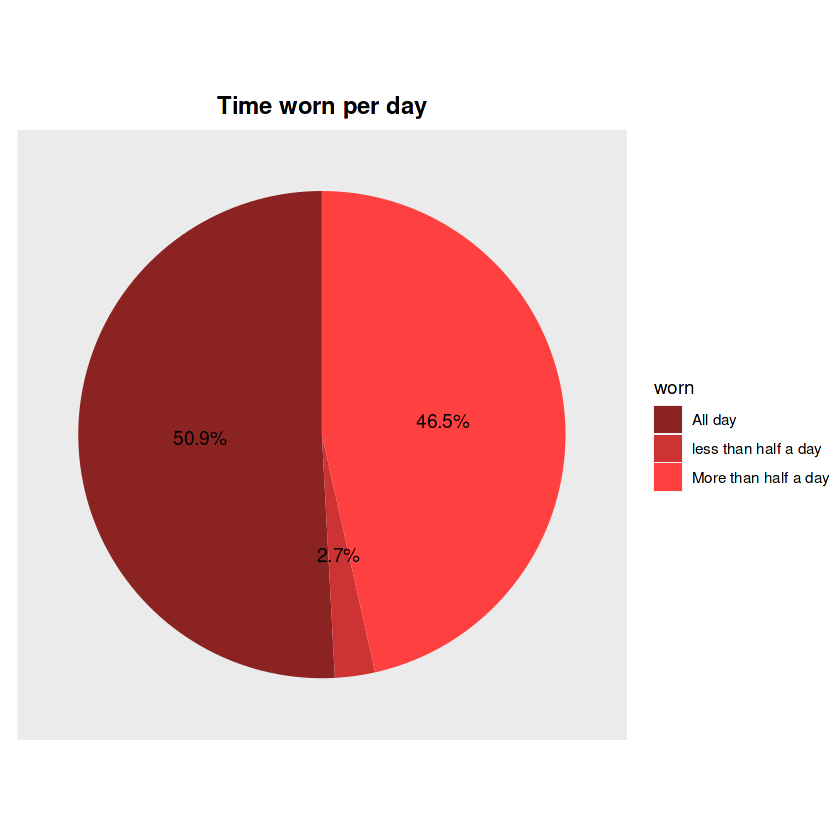

In [22]:
minutes_worn<-daily_activity %>%
  mutate(total_minutes_worn=veryactiveminutes+fairlyactiveminutes+lightlyactiveminutes+sedentaryminutes) %>%
  mutate(percent_minutes_worn=(total_minutes_worn/1440)*100)%>%
   mutate(worn=case_when(
     percent_minutes_worn== 100 ~ "All day",
     percent_minutes_worn < 100 & percent_minutes_worn >= 50 ~ "More than half a day",
     percent_minutes_worn < 50 & percent_minutes_worn >= 0 ~ "less than half a day"))

minutes_worn_percent<- minutes_worn%>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

 

minutes_worn_percent %>%
  ggplot(aes(x="", y=total_percent, fill=worn)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("brown4", "brown3", "brown1")) +
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label= labels),
            position = position_stack(vjust = 0.5)) +
  labs(title = "Time worn per day")

On our chart we can see that 50.9% of the user wear the device all day, 46,5% more than half a day and only 2,7% less than half a day


## 6. Act Phase

Bellabeat provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. 

After our analysis we have found different trends that may help in improving the Bellabeat app. Datasets that we have used are small samples that can be biased, regardless of that we got interesting trends that can help Bellabeat.

Our recommendation:

1. Notification on steps daily and hourly. Users daily walk an average of 7,500 steps per day. The recommended steps per day are at least 8,000 steps. If the users have the features to add the recommended steps per day, they can receive notification to remind them that they did not reach their goal. We also noticed a trend in hourly steps, sending notifications every hour to remind the user to move their body by explaining why it is important to move.

1. Fitness tracking. We found a positive correlation between the total steps and calories. I recommend connecting with the app for tracking the calories burned when walking and also through different workouts and having tables where users can see what activity burns more calories, and also to see the intensity of the workout. 

1. Sleeping tracking. This analysis shows us only the amount of sleeping but not the quality of sleeping and at what time users go to sleep. It is recommended to have sensors that can track the quality of sleeping and what time users go to sleep.

